# Домашнее задание №1: Классификация. 
# Логистическая регрессия и kNN.

Форма для сдачи будет опубликована позднее.

### Пожалуйста, не производите никаких манипуляций с  переменной `_dict_for_submission` и с ячейками, в которых она используется. На ее основе будет сгенерирован итоговый файл для сдачи задания.

In [1]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission = dict()


def transform_list(list_of_ints):
    return [str(x) for x in list_of_ints]
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Часть 1. Небольшой numpy-разогрев. (10%)

In [2]:
import numpy as np
import pandas as pd

In [ ]:
# Создайте матрицу A размерами 10 на 10 из упорядоченных целых чисел от 0 до 100
# hint: np.arange(100).reshape((10, 10))

A = # Ваш код здесь

In [ ]:
# Посчитайте средние значения в матрице по столбцам

# Ваш код здесь

In [ ]:
# Транспонируйте матрицу A

# Ваш код здесь

In [ ]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 

# Ваш код здесь

In [ ]:
# Посчитайте matrix product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Matrix_multiplication
# or https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html

B = # Ваш код здесь

#### Не меняйте следующую ячейку. Просто запустите ее.

In [ ]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission['B'] = transform_list(list(B.flatten()))
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Часть 2. Логистическая регрессия и kNN.

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [14]:
import pandas as pd
import numpy as np

In [15]:
# If on colab, uncomment the following lines

# !wget "https://downloader.disk.yandex.com/disk/cd3ead013809a9da37434c792796d4b063dfc89571c68c273ca3788013b82bf8/5d865a2d/8bfV6Unxao6CYWcER5-G5fza25GZaFjE_xFvc0-ExCwlqmFjBf2bynRfBnL6ubJC8XhsoYHi7h9Nu6gfvS8wxg%3D%3D?uid=76549735&filename=forest_dataset.csv&disposition=attachment&hash=&limit=0&content_type=application%2Fvnd.ms-excel&owner_uid=76549735&fsize=1293856&hid=9b439c18e67923b45c3b3d8891bdf9ab&media_type=spreadsheet&tknv=v2&etag=45e530aa3c9796cb705d4e27be7a6e9c" -O forest_dataset.csv

# Data extraction and preprocessing

In [146]:
all_data = pd.read_csv('forest_dataset.csv')

In [147]:
for col in all_data.columns[:-1]:
    if len(set(np.array(all_data[col], dtype = int))) == 1:
        del all_data[col]
        print('DEL: ', col, ' due to uninformative feature')

DEL:  28  due to uninformative feature


In [148]:
def normalized_column(data_column):
    init_col = np.array(data_column)
    return (init_col - min(init_col))/(max(init_col) - min(init_col))

In [149]:
for col in all_data.columns[:-1]:
    all_data[col] = normalized_column(all_data[col]) 
    #print(max(normalized_column(all_data[col])), min(normalized_column(all_data[col])))
    if True in set(np.isnan(normalized_column(all_data[col]))):
        print(col, 'NAN')
    if False in set(np.isfinite(normalized_column(all_data[col]))):
        print(col, 'INF')

In [121]:
import seaborn as sns
all_data.corr()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.010214,-0.242673,0.300059,0.091208,0.359878,0.105216,0.191144,0.057023,0.168457,...,0.170611,0.086204,0.010361,0.086509,0.018897,0.036639,0.205214,0.187034,0.191868,-0.286710
1,0.010214,1.000000,0.085626,0.001908,0.069339,0.038226,-0.568326,0.338419,0.640818,-0.094873,...,0.061226,0.017036,0.005295,-0.028278,0.003705,-0.027207,0.011112,0.030217,-0.024972,0.019976
2,-0.242673,0.085626,1.000000,-0.006802,0.275740,-0.214791,-0.336869,-0.508009,-0.159830,-0.180753,...,-0.131570,0.227267,0.005280,-0.022090,0.005228,0.004591,-0.067760,0.093886,0.033696,0.154022
3,0.300059,0.001908,-0.006802,1.000000,0.593927,0.072364,-0.020338,0.038007,0.041348,0.066151,...,0.137972,0.110181,0.065346,-0.003990,0.018666,-0.024161,0.037907,0.017142,0.113808,-0.040689
4,0.091208,0.069339,0.275740,0.593927,1.000000,-0.055871,-0.171258,-0.110617,0.039311,-0.056409,...,0.057334,0.186098,0.059205,0.001767,0.011962,-0.015988,-0.014350,0.036727,0.146806,0.065398
5,0.359878,0.038226,-0.214791,0.072364,-0.055871,1.000000,0.030051,0.192890,0.111083,0.338375,...,-0.098431,-0.072168,0.013604,-0.010178,0.004930,0.019231,0.081387,0.038199,0.021088,-0.151493
6,0.105216,-0.568326,-0.336869,-0.020338,-0.171258,0.030051,1.000000,0.022054,-0.776054,0.117351,...,-0.003690,-0.061267,-0.016039,0.035759,0.006938,0.004192,0.017916,-0.066013,-0.006694,-0.041992
7,0.191144,0.338419,-0.508009,0.038007,-0.110617,0.192890,0.022054,1.000000,0.584996,0.044196,...,0.104962,-0.090678,0.025403,0.011101,0.019392,-0.023998,0.032877,-0.064832,-0.064605,-0.096541
8,0.057023,0.640818,-0.159830,0.041348,0.039311,0.111083,-0.776054,0.584996,1.000000,-0.042692,...,0.083057,-0.034351,0.026468,-0.020778,0.003626,-0.015837,0.013978,0.005383,-0.032120,-0.043332
9,0.168457,-0.094873,-0.180753,0.066151,-0.056409,0.338375,0.117351,0.044196,-0.042692,1.000000,...,-0.088007,-0.057107,-0.024544,-0.007305,-0.011706,0.009142,-0.017144,0.005324,0.015166,-0.108902


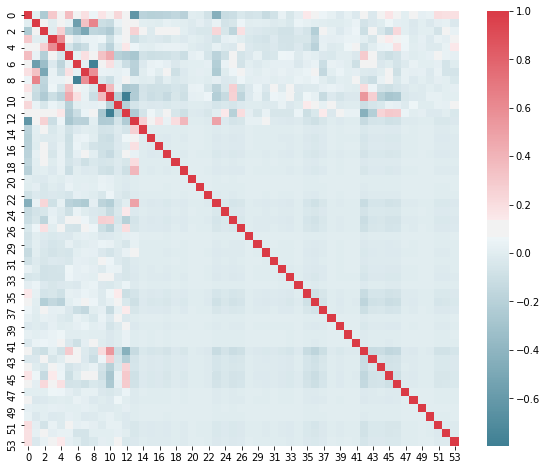

In [115]:
f, ax = plt.subplots(figsize=(10, 8))
corr = all_data.drop(['54'], axis=1).corr()
sns.heatmap(corr, square=True, ax=ax, cmap=sns.diverging_palette(220, 10, as_cmap=True))

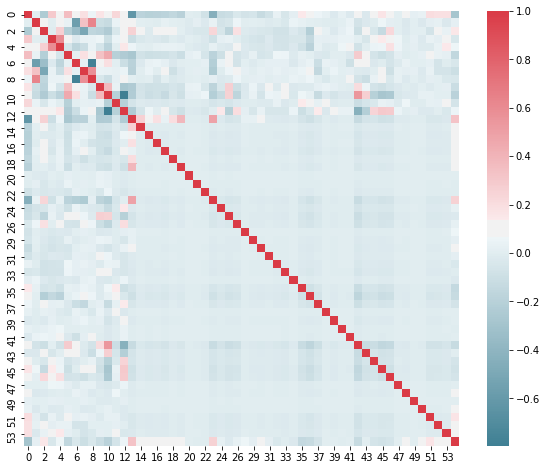

In [117]:
f, ax = plt.subplots(figsize=(10, 8))
corr = all_data.corr()
sns.heatmap(corr, square=True, ax=ax, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [122]:
for col_1 in all_data.columns[:-1]:
    for col_2 in all_data.columns[:-1]:
        if col_1 != col_2:
            if all_data.corr()[col_1][col_2] > 0.5:
                print(col_1, col_2, ' correlated with ', all_data.corr()[col_1][col_2])


1 8  correlated with  0.6408177926628138
3 4  correlated with  0.5939274810415854
4 3  correlated with  0.5939274810415854
7 8  correlated with  0.5849963617627716
8 1  correlated with  0.6408177926628138
8 7  correlated with  0.5849963617627716
10 42  correlated with  0.5479870810325541
42 10  correlated with  0.5479870810325541


In [150]:
del all_data['8'], all_data['4'], all_data['42']

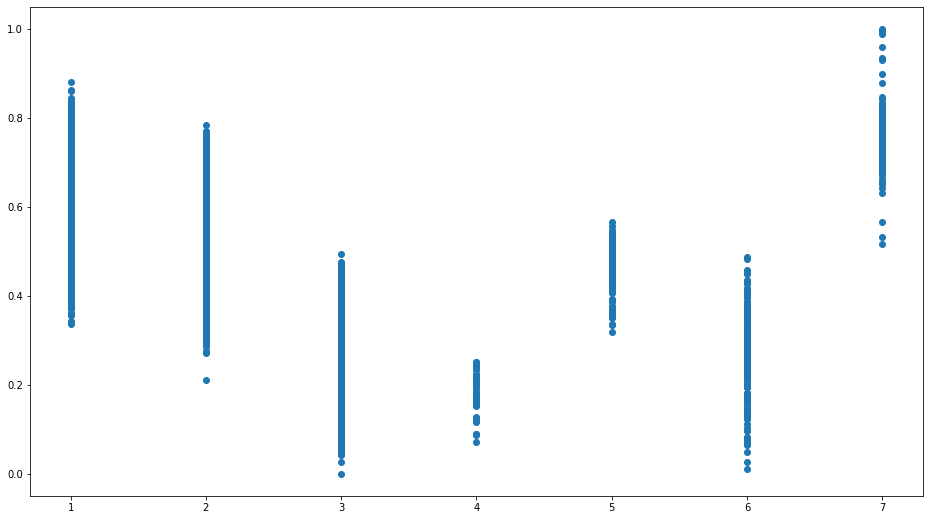

In [79]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16, 9))
plt.scatter(all_data['54'], all_data['0'])
plt.show() 

Выделим 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей (до конца ноутбука она более не используется), в `all_data` поместим оставшиеся 80%. Не будем перемешивать данные сознательно (для удобства проверки).

In [151]:
delayed_data = all_data[int(0.8 * len(all_data)):]
all_data = all_data[:int(0.8 * len(all_data))]

Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [152]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

delayed_labels = delayed_data[delayed_data.columns[-1]].values
delayed_feature_matrix = delayed_data[delayed_data.columns[:-1]].values

#### 2.1 Двуклассовая классификация (10%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [153]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

import numpy as np
from matplotlib import pyplot as plt

In [154]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

In [155]:
len(two_class_labels)

6856

In [156]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    two_class_feature_matrix, 
    two_class_labels, 
    test_size=0.2,
    random_state=42,
)

In [157]:
print(len(train_labels), len(test_labels))

5484 1372


Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [158]:
lr_clf = LogisticRegression(C=3000, fit_intercept=True, max_iter = 1000)
lr_clf.fit(train_feature_matrix, train_labels)

LogisticRegression(C=3000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [159]:
predictions = lr_clf.predict(test_feature_matrix)
acc = accuracy_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)
print('accuracy: ', acc, '\nf1_score: ', f1)

accuracy:  0.7638483965014577 
f1_score:  0.7249575551782682


In [160]:
def decisions(train_data, train_labels, test_data, test_labels, C = 1.0):
    
    lr_clf = LogisticRegression(C=C, fit_intercept=True, max_iter = 1000)
    lr_clf.fit(train_data, train_labels)
    
    predictions = lr_clf.predict(test_data)
    acc = accuracy_score(test_labels, predictions)
    f1 = f1_score(test_labels, predictions)
    
    return acc, f1

In [161]:
def optimal_regularization_strength(train_data, train_labels, test_data, test_labels):
    
    optimal = {'accuracy': 0, 'C': 0}
    accuracy_scores = []

    C = np.logspace(-3, 3, 100)
    
    for reg_const in C:
        acc, f1 = decisions(train_data, train_labels, test_data, test_labels, reg_const)
        accuracy_scores.append(acc)
        
        if acc > optimal['accuracy']:
            optimal['accuracy'], optimal['C'] = acc, reg_const
        
    print(optimal)
    plt.xscale('log')
    plt.figure(figsize=(16, 9))
    plt.plot(C, accuracy_scores)
    plt.show()    

{'accuracy': 0.7660349854227405, 'C': 3.2745491628777286}


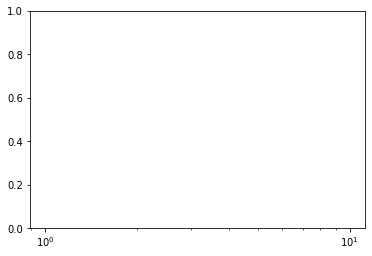

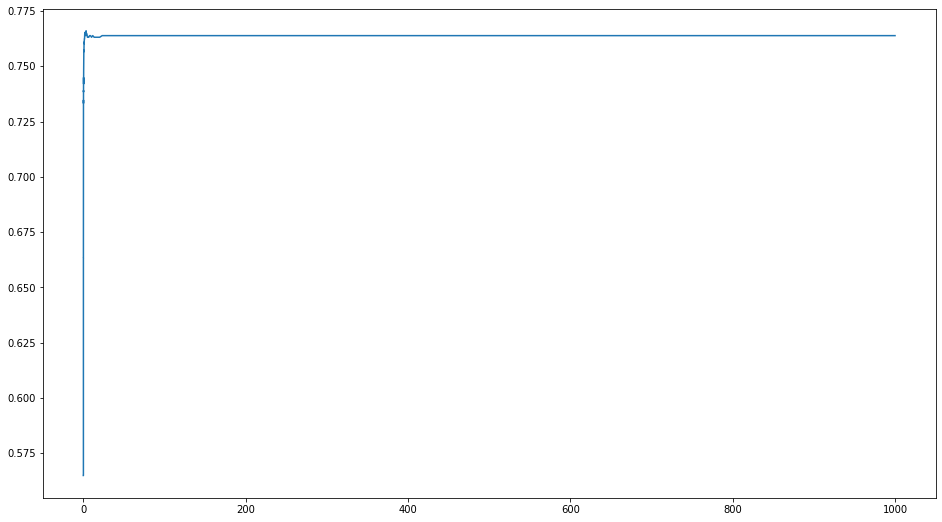

In [162]:
optimal_regularization_strength(train_feature_matrix,  train_labels, test_feature_matrix, test_labels)

#### 2.2 Многоклассовая классификация: логистическая регрессия (40%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [163]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, 
    labels, 
    test_size=0.2,
    random_state=42,
)

In [164]:
lr_clf = LogisticRegression(C = 1000, multi_class='ovr', n_jobs=10, max_iter = 1000, tol = 0.9)
lr_clf.fit(train_feature_matrix, train_labels)

predictions = lr_clf.predict(test_feature_matrix)
acc = accuracy_score(test_labels, predictions)
print('accuracy: ', acc)
# Ваш код здесь

accuracy:  0.714375


С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [165]:
from sklearn.model_selection import GridSearchCV
logistic = LogisticRegression(multi_class='ovr',n_jobs=10, max_iter = 1000, tol = 0.9)
parameters = {'penalty': ['l1', 'l2'], 'C': np.linspace(0.01, 1, 10)}

lr_clf = GridSearchCV(logistic, parameters, scoring = 'accuracy' )
lr_clf.fit(train_feature_matrix, train_labels)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_se

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='ovr',
                                          n_jobs=10, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.9, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [166]:
predictions = lr_clf.predict(test_feature_matrix)
acc = accuracy_score(test_labels, predictions)
print('accuracy: ', acc)

accuracy:  0.704375


Постройте графики средних значений критерия качества `accuracy` для типов регуляризации `l1` и `l2` в зависимости от коэффициента регуляризации `C`.

In [167]:
def multi_class_decisions(train_data, train_labels, test_data, test_labels, C = 1.0, penalty = 'l2'):
    
    lr_clf = LogisticRegression(C=C, multi_class='ovr',n_jobs=10, max_iter = 1000, 
                                solver = 'saga', penalty = penalty, tol = 0.9)
    lr_clf.fit(train_data, train_labels)
    
    predictions = lr_clf.predict(test_data)
    acc = accuracy_score(test_labels, predictions)
    return acc

def optimal_parameters(train_data, train_labels, test_data, test_labels):
    
    optimal = {'REG': 'l1', 'accuracy': 0, 'C': 0} 
               
    
    accuracy_scores = {'l1': [], 'l2': []}

    C_space = np.logspace(-3, 3, 30)
    #Cs = np.exp(np.linspace(-4, 4, 10))
    penalty_space = ['l1', 'l2'] 
    
    for penalty in penalty_space:
        for C in C_space:
            acc = multi_class_decisions(train_data, train_labels, test_data, test_labels, C, penalty)
            accuracy_scores[penalty].append(acc)
            print(penalty, C, acc)
        
            if acc > optimal['accuracy']:
                optimal['accuracy'], optimal['C'], optimal['REG'] = acc, C, penalty
        
    print(optimal)
    
    plt.figure(figsize=(16, 9))
    plt.plot(C_space, accuracy_scores['l1'], 'r-', accuracy_scores['l2'], 'b--')
    plt.show()

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

l1 0.001 0.478125
l1 0.0016102620275609393 0.478125
l1 0.002592943797404667 0.478125
l1 0.0041753189365604 0.478125
l1 0.006723357536499335 0.479375
l1 0.010826367338740546 0.65625
l1 0.017433288221999882 0.6275
l1 0.02807216203941177 0.64625
l1 0.04520353656360243 0.671875
l1 0.0727895384398315 0.68
l1 0.11721022975334805 0.6725
l1 0.18873918221350977 0.708125
l1 0.3039195382313198 0.659375
l1 0.4893900918477494 0.694375
l1 0.7880462815669912 0.706875
l1 1.2689610031679222 0.70375
l1 2.0433597178569416 0.701875
l1 3.2903445623126677 0.705625
l1 5.298316906283707 0.694375
l1 8.531678524172806 0.7025
l1 13.738237958832638 0.703125
l1 22.122162910704503 0.70875
l1 35.622478902624444 0.698125
l1 57.361525104486816 0.70375
l1 92.36708571873865 0.7075
l1 148.73521072935117 0.696875
l1 239.5026619987486 0.689375
l1 385.6620421163472 0.701875
l1 621.0169418915616 0.69625
l1 1000.0 0.70125
l2 0.001 0.478125
l2 0.0016102620275609393 0.486875
l2 0.002592943797404667 0.53125
l2 0.0041753189365604

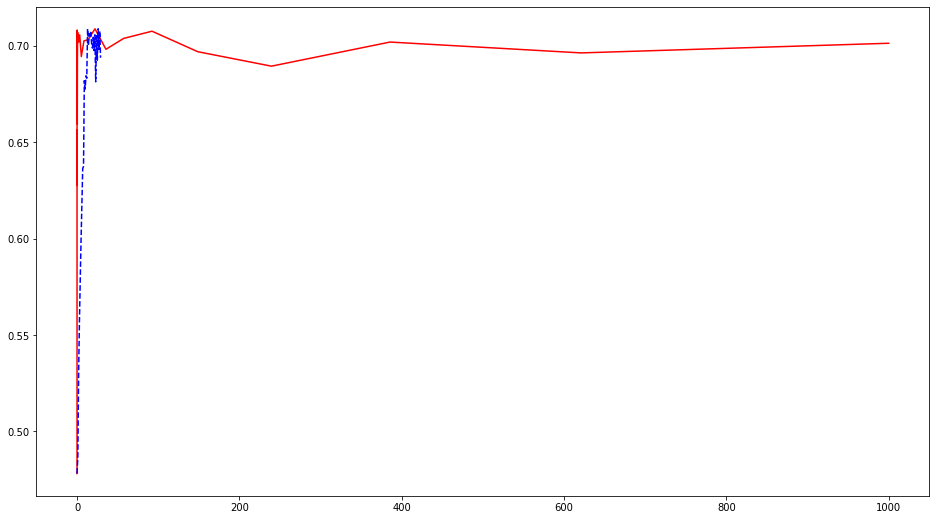

In [168]:
optimal_parameters(train_feature_matrix,  train_labels, test_feature_matrix, test_labels)

Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке (train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [170]:
best_lr_clf = LogisticRegression(C=22.122162910704503, multi_class='ovr',n_jobs=10, max_iter = 1000, 
                                solver = 'saga', penalty = 'l1', tol = 0.9)
best_lr_clf.fit(train_feature_matrix, train_labels)
    
predictions = lr_clf.predict(test_feature_matrix)
acc = accuracy_score(test_labels, predictions)
print(acc)

# Ваш код здесь

0.704375


Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

In [ ]:
# Ваш код здесь

#### 2.3 Многоклассовая классификация: kNN (30%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

In [174]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(train_feature_matrix, train_labels)

predictions = clf.predict(test_feature_matrix)
accuracy_score(test_labels, predictions)

0.726875

In [183]:
def knn_decisions(train_data, train_labels, test_data, test_labels, num_neighbors = 5,  weights = 'uniform'):
    
    knn_clf = KNeighborsClassifier(n_neighbors=num_neighbors, n_jobs=10, weights = weights)
    knn_clf.fit(train_data, train_labels)
    predictions = knn_clf.predict(test_data)
    
    return accuracy_score(test_labels, predictions)

def knn_optimal_parameters(train_data, train_labels, test_data, test_labels):
    
    optimal = {'weights': 'uniform', 'accuracy': 0, 'num_neighb': 0} 
               
    
    accuracy_scores = {'uniform': [], 'distance': []}

    neighb = np.linspace(1,30, 30, dtype = int)
    #Cs = np.exp(np.linspace(-4, 4, 10))
    Ws = ['uniform', 'distance'] 
    
    for W in Ws:
        for num_neighbors in neighb:
            acc = knn_decisions(train_data, train_labels, test_data, test_labels, num_neighbors, W)
            accuracy_scores[W].append(acc)
            print(W, num_neighbors, acc)
        
            if acc > optimal['accuracy']:
                optimal['accuracy'], optimal['num_neighb'], optimal['weights'] = acc, num_neighbors, W
        
    print(optimal)
    
    plt.figure(figsize=(16, 9))
    plt.plot(neighb, accuracy_scores['uniform'], 'r-', accuracy_scores['distance'], 'b-')
    plt.show()



Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

uniform 1 0.74125
uniform 2 0.72125
uniform 3 0.73375
uniform 4 0.731875
uniform 5 0.726875
uniform 6 0.726875
uniform 7 0.725625
uniform 8 0.725625
uniform 9 0.723125
uniform 10 0.715
uniform 11 0.7125
uniform 12 0.7075
uniform 13 0.708125
uniform 14 0.703125
uniform 15 0.71
uniform 16 0.71125
uniform 17 0.715
uniform 18 0.71125
uniform 19 0.7075
uniform 20 0.715
uniform 21 0.711875
uniform 22 0.706875
uniform 23 0.70625
uniform 24 0.703125
uniform 25 0.710625
uniform 26 0.705
uniform 27 0.71
uniform 28 0.708125
uniform 29 0.7075
uniform 30 0.69875
distance 1 0.74125
distance 2 0.74125
distance 3 0.750625
distance 4 0.753125
distance 5 0.7525
distance 6 0.75125
distance 7 0.75625
distance 8 0.74375
distance 9 0.745625
distance 10 0.744375
distance 11 0.741875
distance 12 0.73875
distance 13 0.73625
distance 14 0.741875
distance 15 0.735625
distance 16 0.740625
distance 17 0.735
distance 18 0.74
distance 19 0.74
distance 20 0.740625
distance 21 0.740625
distance 22 0.73375
distance 23 

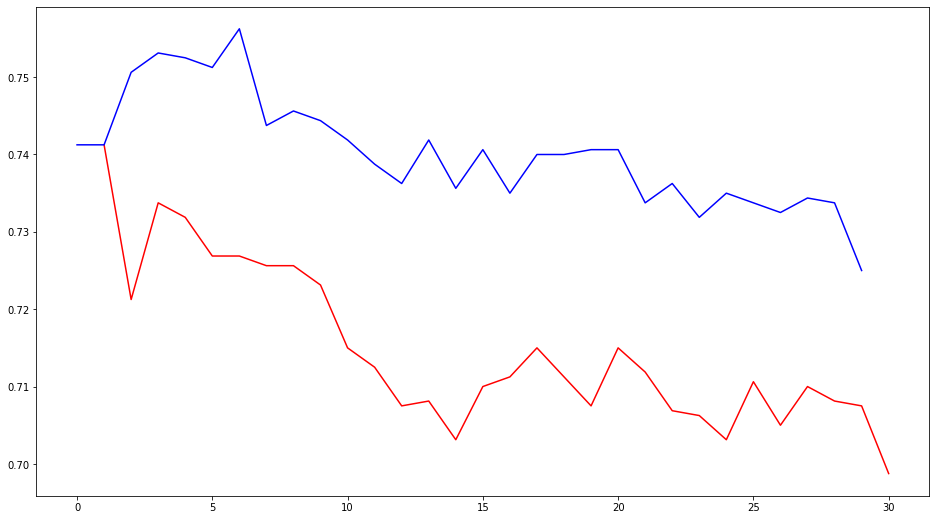

In [184]:
knn_optimal_parameters(train_feature_matrix,  train_labels, test_feature_matrix, test_labels)


Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [ ]:
# Ваш код здесь

Создайте объект `best_knn_clf`, который представляет собой лучший классификатор.

In [186]:
# Hint: для этого достаточно указать стратегию вычисления весов и число соседей в конструкторе

best_knn_clf = KNeighborsClassifier(n_neighbors=7, weights='distance')
best_knn_clf.fit(train_feature_matrix, train_labels)
    
predictions = best_knn_clf.predict(test_feature_matrix) 
print(accuracy_score(test_labels, predictions))


0.75625


#### 2.4 Сравнение результатов логистической регрессии и kNN (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии `best_lr_clf` и лучшего kNN `best_knn_clf` на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [187]:
# Ваш код здесь
knn_predictions = best_knn_clf.predict(delayed_feature_matrix)
lr_predictions = best_lr_clf.predict(delayed_feature_matrix)

print('KNN accuracy:', accuracy_score(delayed_labels, knn_predictions), 
      '\nLR accuracy:', accuracy_score(delayed_labels, lr_predictions))



KNN accuracy: 0.7425 
LR accuracy: 0.7095


#### Не меняйте следующую ячейку. Запустите ее для генерации `submission` файла.

In [ ]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission['best_lr_clf_delayed'] = transform_list(list(best_lr_clf.predict(delayed_feature_matrix)))
_dict_for_submission['best_knn_clf_delayed'] = transform_list(list(best_knn_clf.predict(delayed_feature_matrix)))

import json
with open('submission_hw1_basic.json', 'w') as iofile:
    json.dump(_dict_for_submission, iofile)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Данный файл необходимо будет прикрепить к Google-форме для сдачи домашнего задания. __Для идентификации используется e-mail, который вы указали при регистрации на курс. Проверка производится автоматически. Если вы подпишитесь другим e-mail'ом, задание просто не будет засчитано.__

На этом задание завершено. Мы будем рады, если вы оставите обратную связь по данному заданию [по ссылке](https://forms.gle/2qaf14ky3J6HZfe48). Она анонимна ;)